# Trivial spam classifier

This is a step-by-step guidance for a simple spam classifier, first, using basic RNN with LSTM layers. And then, comparing it with a few alternative architectures that are commonly used in text classification tasks like spam detection.

## Prerequisites
You need to ensure you have the dataset available. I used Google Colab, mounted the drive, and used the valid path to the dataset .csv file `dataset_path` specified in the code.

## Acknowledgements

The dataset used is from [Email Spam Detection Dataset (classification)](https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification/).

# Mount drive and define dataset path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Colab Notebooks/Trivial spam classifier/spam_or_not_spam.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preparation
Load the dataset and shuffle the data. This is done to randomize the order of the rows, which can be useful when preparing data for training to avoid any bias introduced by the original order of the data.

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

data=pd.read_csv(dataset_path)
data.head()
data = shuffle(data)

Iterate over each row in the DataFrame using. For each row, convert the content of the 'email' column to a string and append it to the `text` list.

In [ ]:
data['label'].value_counts()
text =[]

for index, rows in data.iterrows():
    my_list =str(rows.email)
    text.append(my_list)

len(text)

5572

 ## Text tokenization
 Prepare your text data for a text classification ML model. Tokenize the text data using the Tokenizer class, which is typically used in natural language processing (NLP) tasks.

In [ ]:
from keras.preprocessing.text import Tokenizer

# Extract the 'label' column as a list.
label = list(data['label'])

# Create an instance of the Tokenizer class with a vocabulary size of 1000.
tokenizer = Tokenizer(num_words=1000)

# Fit the tokenizer on the 'text' data.
tokenizer.fit_on_texts(text)

# Convert the 'text' data into sequences of integers.
sequences = tokenizer.texts_to_sequences(text)

Split the data into training and testing sets. Pad the sequences to ensure they all have the same length. In text data, it's common to pad or truncate sequences to a fixed length before feeding them into a neural network.

In [ ]:
from keras import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(sequences, label, test_size=0.2, random_state=42)

maxlen = 20
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Convert to NumPy arrays.
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_train)
y_test = np.array(y_train)

# Model implementation
Let's initilize a sequential model using Keras, where you can add layers one by one in sequence.
* First, add an Embedding layer to the model. It is often used for handling text data or categorical data where there is a need to convert integer-encoded representations of words or categories into dense vectors of fixed size.

* Then, add a Long Short-Term Memory (LSTM) layer with 32 units to the model. It is a type of recurrent neural network (RNN) layer. It is used for handling sequential data, capturing dependencies over time.

* And lastly, add a dense layer with a single unit and a sigmoid activation function. It is a fully connected layer, where each neuron in the layer is connected to every neuron in the previous layer. In our case `1` indicates that the output is a single scalar value (binary classification).

Then complile the model with the parameters:
* `rmsprop` optimization algorithm used during training (Root Mean Square Propagation adapts the learning rates of each parameter individually)
* `binary_crossentropy` loss function (well-suited for binary classification problems where each example belongs to only one of the two classes)
* `acc` metric used to evaluate the performance of the model during training (accuracy measures the proportion of correctly classified examples out of the total number of examples).

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model_lstm = Sequential()
model_lstm.add(Embedding(2000, 8, input_length=maxlen))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 20, 8)             16000     
                                                                 
 lstm_5 (LSTM)               (None, 32)                5248      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21281 (83.13 KB)
Trainable params: 21281 (83.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model training

To train out model, we specify the parameters:

* Epochs: how many times the model will iterate over the entire training dataset.
* Batch size: the number of samples in each batch, or sub-division of the training data after processing which the model weights are updated.
* Validation split: the portion of the training data that will be used for validation (e.g., 20% of the training data).

In [ ]:
history_lstm = model_lstm.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 4s 17ms/step - loss: 0.4196 - acc: 0.8645 - val_loss: 0.4117 - val_acc: 0.8576
Epoch 2/10
112/112 [==============================] - 1s 12ms/step - loss: 0.3913 - acc: 0.8687 - val_loss: 0.4142 - val_acc: 0.8576
Epoch 3/10
112/112 [==============================] - 2s 17ms/step - loss: 0.3897 - acc: 0.8687 - val_loss: 0.4175 - val_acc: 0.8576
Epoch 4/10
112/112 [==============================] - 2s 17ms/step - loss: 0.3871 - acc: 0.8687 - val_loss: 0.4187 - val_acc: 0.8576
Epoch 5/10
112/112 [==============================] - 1s 12ms/step - loss: 0.3819 - acc: 0.8687 - val_loss: 0.4179 - val_acc: 0.8576
Epoch 6/10
112/112 [==============================] - 1s 12ms/step - loss: 0.3721 - acc: 0.8687 - val_loss: 0.4200 - val_acc: 0.8576
Epoch 7/10
112/112 [==============================] - 1s 12ms/step - loss: 0.3568 - acc: 0.8696 - val_loss: 0.4345 - val_acc: 0.8543
Epoch 8/10
112/112 [==============================] - 1s 12ms/step - 

# Learning curves

Once the training is done, we can look at the learning curves that help to

### Training loss
Represents the value of the loss function on the training dataset.

**Interpretation**: A decreasing training loss suggests that the model is improving its ability to fit the training data. If the training loss remains high and doesn't decrease significantly over epochs, it indicates that the model is struggling to fit the training data. This could be a sign of underfitting (also known as **high bias**).

### Validation loss
Represents the value of the loss function on a separate validation dataset not used during training.

**Interpretation**: If the training loss is decreasing but the validation loss is increasing or not decreasing, it could be a sign of overfitting (also known as **high variance**). Overfitting occurs when the model learns to perform well on the training data but fails to generalize to new data.

### Training accuracy
Represents the accuracy of the model on the training dataset. It indicates the proportion of correctly classified samples in the training data.

**Interpretation**: Increasing training accuracy is a positive sign, but high training accuracy alone does not guarantee good generalization. It's possible for a model to memorize the training data without truly learning the underlying patterns.

### Validation accuracy
Represents the accuracy of the model on the validation dataset. It helps assess how well the model generalizes to new data not seen during training.

**Interpretation**: Similar to validation loss, if the training accuracy is high but the validation accuracy is significantly lower or not improving, it may indicate overfitting.


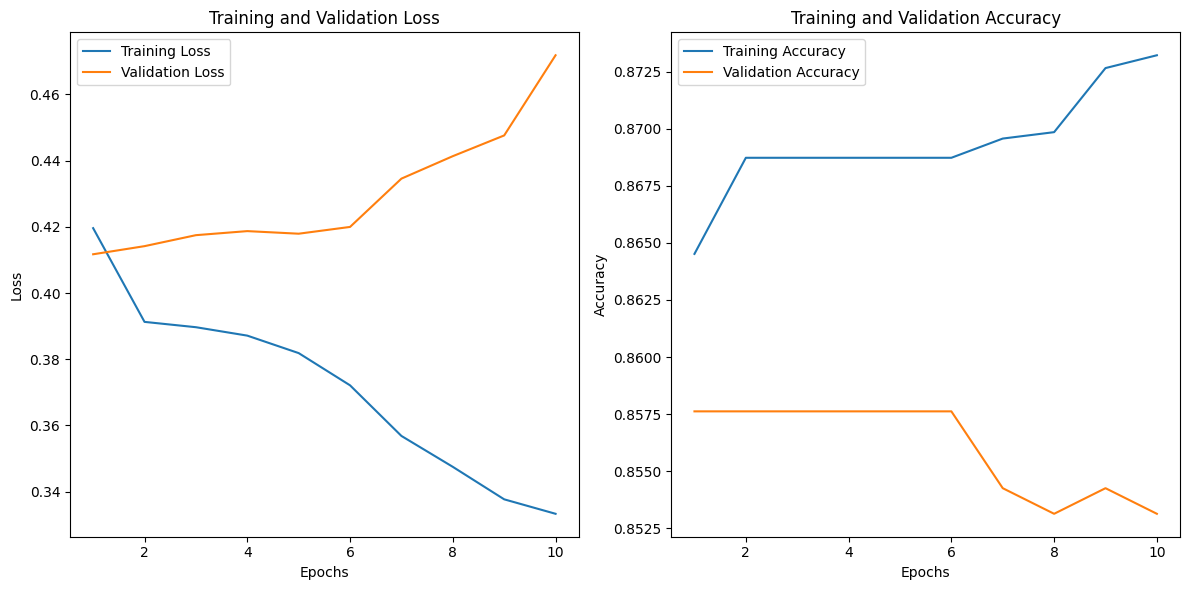

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss values from the history object.
train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

# Get training and validation accuracy values from the history object.
train_acc = history_lstm.history.get('acc', [])
val_acc = history_lstm.history.get('val_acc', [])

plt.figure(figsize=(12, 6))

# Plot training loss.
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy.
if train_acc and val_acc:
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


## Curiosity tip - BARD for image interpretation

Out of curiosity, let's try and see what BARD has to say when it comes to our learning curves interpretation.

https://bard.google.com/chat

**Question:**
*Interpret the learning curves from my ML model training and suggest how I can improve the results.*

**Answer:**

*Sure, I can interpret the learning curves from your image and suggest how you can improve the results.*

*Based on the image, it appears you are training a convolutional neural network (CNN) for image classification, likely using InceptionV3, VGG16, or ResNet50, based on the title of the webpage from where the image is obtained. Here are some observations and suggestions based on the plots:*


**Observations:**

* High training loss compared to validation loss: This suggests that the model is overfitting the training data. This means the model is memorizing the specific examples in the training set and may not perform well on unseen data.

* Similar trends in training and validation accuracy: This is a good sign, as it shows that the model is learning and generalizing well.

* Accuracy plateaus after a few epochs: This suggests that the model may have reached its learning capacity.

**Suggestions:**

***Reduce overfitting:***

* Collect more training data: This is the most effective way to reduce overfitting. If possible, try to get more diverse training data that is representative of the real world data that the model will be used on.

* Regularization: Apply techniques like L1 or L2 regularization, dropout, or data augmentation to reduce the complexity of the model and prevent it from memorizing the training data.

* Early stopping: Stop training the model early, before it starts to overfit the training data. You can use a validation set to monitor the model's performance and stop training when the validation loss starts to increase.

***Improve accuracy:***

* Try a different architecture: If you are not satisfied with the accuracy of the model, you can try a different CNN architecture that is better suited for your task.

* Train for longer: If you have sufficient training data, you can try training the model for longer. However, be careful not to overfit the training data.

* Fine-tuning: If you have a pre-trained model, you can fine-tune it on your specific task. This can be a good way to improve accuracy without having to train a model from scratch.

*It is important to experiment with different techniques and see what works best for your specific task and dataset.*

*I hope this helps!*

###Conclusion

Kind of obvious suggestions, but I am still impressed. Thank you, BARD!

## Fixing high bias / high variance

At this point I want to insert a nice summary from the [Andrew Ng Machine Learning course](https://www.coursera.org/specializations/machine-learning-introduction?utm_medium=sem&utm_source=gg&utm_campaign=B2C_EMEA_machine-learning-introduction_stanford_FTCOF_specializations_country-multiple-set1&campaignid=20858198833&adgroupid=156245838629&device=c&keyword=andrew%20ng%20machine%20learning&matchtype=p&network=g&devicemodel=&adposition=&creativeid=684249172051&hide_mobile_promo&gad_source=1&gclid=Cj0KCQiAnrOtBhDIARIsAFsSe51HA3UifJdlZAt_9vYGzmb3xWMwz6qwdXEGs4cJiGil-AsCWGQG52kaAmkcEALw_wcB) on the practical approaches to fixing high bias / high variances and model effects.

* Getting more training examples: Fixes high variance
* Trying smaller sets of features: Fixes high variance
* Adding features: Fixes high bias
* Adding polynomial features: Fixes high bias
* Decreasing λ: Fixes high bias
* Increasing λ: Fixes high variance.

### Diagnosing neural networks

* A neural network with fewer parameters is prone to underfitting. It is also computationally cheaper.
* A large neural network with more parameters is prone to overfitting. It is also computationally expensive. In this case you can use regularization (increase λ) to address the overfitting.

Using a single hidden layer is a good starting default. You can train your neural network on a number of hidden layers using your cross validation set. You can then select the one that performs best.

### Model complexity effects

* Lower-order polynomials (low model complexity) have high bias and low variance. In this case, the model fits poorly consistently.

* Higher-order polynomials (high model complexity) fit the training data extremely well and the test data extremely poorly. These have low bias on the training data, but very high variance.

* In reality, we would want to choose a model somewhere in between, that can generalize well but also fits the data reasonably well.


# Model evaluation

Now let's assess the performance of the trained model on a test dataset.

In [ ]:
result=model_lstm.evaluate(x_test,y_test)
print("test loss:{}\ntest accuracy:{}".format(result[0],result[1]))

140/140 [==============================] - 1s 4ms/step - loss: 0.3478 - acc: 0.8730
test loss:0.3477592170238495
test accuracy:0.8730087280273438


**Test loss**: represents the difference between the model's predictions and the actual labels on the test data. In this case it is relatively low.

**Test accuracy**: measures the proportion of correctly classified examples in the test dataset.

# Alternative solutions

## RNN (GRU)

An alternative approach for spam classification could be using a different type of recurrent neural network (RNN) like a GRU (Gated Recurrent Unit) instead of LSTM. Additionally, you might consider incorporating dropout layers to help prevent overfitting.

In [ ]:
from keras.layers import GRU, Dropout

model_gru = Sequential()
model_gru.add(Embedding(2000, 8, input_length=maxlen))
model_gru.add(GRU(32)) # Use GRU instead of LSTM.
model_gru.add(Dropout(0.5)) # Add dropout for regularization.
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_gru.summary()
history_gru = model_gru.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 20, 8)             16000     
                                                                 
 gru_4 (GRU)                 (None, 32)                4032      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
112/112 [==============================] - 8s 39ms/step - loss: 0.4460 - acc: 0.8654 - val_loss: 0.4106 - val_acc: 0.8576
Epoch 2/10
112/1

## CNN

Another alternative approach for spam classification is to use a 1D convolutional neural network (CNN).

In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential()
model_cnn.add(Embedding(2000, 8, input_length=maxlen))
model_cnn.add(Conv1D(32, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_cnn.summary()
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 20, 8)             16000     
                                                                 
 conv1d_3 (Conv1D)           (None, 16, 32)            1312      
                                                                 
 global_max_pooling1d_3 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17345 (67.75 KB)
Trainable params: 17345 (67.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
112/112 [==============================] - 1s 5ms/step - loss: 0.4743 - 

## BERT model

The 3rd alternative solution we will try is Bidirectional Encoder Representations from Transformers (BERT). It is a pre-trained natural language processing model developed by Google. It belongs to the transformer-based model family. BERT has achieved state-of-the-art performance on a wide range of natural language understanding tasks.

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy

# Load pre-trained BERT model and tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(x_train.shape)

(4457, 20)


In [94]:
from keras.models import Model
from keras.layers import Input

# Convert 2D list of sequences to text format.
x_train_texts = [' '.join(map(str, sequence)) for sequence in x_train]
x_test_texts = [' '.join(map(str, sequence)) for sequence in x_test]

# Tokenize and preprocess the data.
x_train_tokens = tokenizer(x_train_texts, padding=True, truncation=True, return_tensors="tf")
x_test_tokens = tokenizer(x_test_texts, padding=True, truncation=True, return_tensors="tf")

# Build a Keras model for binary classification using BERT.
inputs = {key: Input(shape=(32,), dtype='int32', name=key) for key in x_train_tokens}
bert_output = bert_model(inputs)
logits = bert_output.logits

# Extract NumPy arrays from BatchEncoding objects.
x_train_input_ids = x_train_tokens['input_ids'].numpy()
x_train_token_type_ids = x_train_tokens['token_type_ids'].numpy()
x_train_attention_mask = x_train_tokens['attention_mask'].numpy()

# Build and compile the final Keras model.
model_bert = Model(inputs=inputs, outputs=Dense(1, activation='sigmoid')(logits))
model_bert.compile(optimizer=Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the BERT model for spam classification.
history_bert = model_bert.fit(
    {'input_ids': x_train_input_ids, 'token_type_ids': x_train_token_type_ids, 'attention_mask': x_train_attention_mask},
    y_train, epochs=1, batch_size=64, validation_split=0.2
)


56/56 [==============================] - 1421s 25s/step - loss: 0.4465 - accuracy: 0.8345 - val_loss: 0.4093 - val_accuracy: 0.8576


# Comparison of solutions

Here is a recap of pros and cons of the solutions we tried so far.

1. **Recurrent Neural Networks (RNNs) with LSTM or GRU:**
  
  *Pros:* Capture sequential information, effective for analyzing text data with dependencies.
  
  *Cons:* Computationally expensive, potential vanishing/exploding gradient problems, may struggle with very long sequences.
2. **1D Convolutional Neural Networks (CNNs):**

  *Pros:* Capture local patterns in input sequences, computationally efficient, parameter sharing.
  
  *Cons:* May not capture long-range dependencies as effectively as RNNs, sensitivity to hyperparameter tuning.
3. **Pre-trained Language Models (e.g., BERT):**

  *Pros:* Leverage contextual embeddings, capture intricate relationships in language, strong performance on various NLP tasks.
  
  *Cons:* Computationally expensive, requires large amounts of data for fine-tuning, model size can be a limitation.

Below we compare the model accuracy for each architecture.

In [98]:
from sklearn.metrics import accuracy_score

predictions_lstm = model_lstm.predict(x_test)
predicted_classes_lstm = np.argmax(predictions_lstm, axis=1)
accuracy_lstm = accuracy_score(y_test, predicted_classes_lstm)

predictions_gru = model_gru.predict(x_test)
predicted_classes_gru = np.argmax(predictions_gru, axis=1)
accuracy_gru = accuracy_score(y_test, predicted_classes_gru)

predictions_cnn = model_cnn.predict(x_test)
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)
accuracy_cnn = accuracy_score(y_test, predicted_classes_cnn)

# Extract NumPy arrays from BatchEncoding objects.
x_test_input_ids = x_test_tokens['input_ids'].numpy()
x_test_token_type_ids = x_test_tokens['token_type_ids'].numpy()
x_test_attention_mask = x_test_tokens['attention_mask'].numpy()

# Make predictions on the test set.
y_pred_bert = model_bert.predict({'input_ids': x_test_input_ids, 'token_type_ids': x_test_token_type_ids, 'attention_mask': x_test_attention_mask})
predicted_classes_bert = (y_pred_bert > 0.5).astype(int)  # Assuming binary classification, adjust threshold as needed.

# Calculate accuracy using accuracy_score.
accuracy_bert = accuracy_score(y_test, predicted_classes_bert)

print(f'Accuracy with RNN (LSTM): {accuracy_lstm}')
print(f'Accuracy with RNN (GRU): {accuracy_gru}')
print(f'Accuracy with 1D CNN: {accuracy_cnn}')
print(f'Accuracy with BERT: {accuracy_bert}')

140/140 [==============================] - 487s 3s/step
Accuracy with RNN (LSTM): 0.866502131478573
Accuracy with RNN (GRU): 0.866502131478573
Accuracy with 1D CNN: 0.866502131478573
Accuracy with BERT: 0.866502131478573
